# INTERNSAY Internship

## Name: Mohammad Wasiq

## Email: mohammadwasiq0786@gmail,com

## LinkedIn: https://www.linkedin.com/in/mohammadwasiq0/

## GitHub:https://github.com/mohammadwasiq0/

# Customer Segmentation Analysis

Customer segmentation is a process of identifying and describing the different types of customers that exist within a given population. The objective of customer segmentation is to understand each group's needs and behaviors, and to optimize business operations by tailoring the product or service offerings to meet those needs.

The most common technique used to segment customers is clustering. Clustering is a method of grouping customer data so that similar customers are grouped together, while dissimilar ones are placed into separate clusters. K-Means Clustering is an advanced form of clustering, which uses a mathematical model to cluster the data points based on their distance from each other.

<img src="https://www.qualitygurus.com/wp-content/uploads/2022/09/Customer-Segmentation.jpg" alt="Customer Segmentation">

## Import libraries

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
warnings.filterwarnings('ignore')

## Reading the dataset

In [3]:
dataframe = pd.read_csv("Mall_Customers.csv")
dataframe.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Data overview

In [ ]:
dataframe.shape

In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
dataframe.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Checking if there is any null value or not!

In [6]:
dataframe.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In this dataset there are no null values, so we don't need to modify or fill any data.

## Data visualisation

Renaming the columns so that it becomes easier for us to refer them in the future.

In [7]:
dataframe = dataframe.rename(columns={'Annual Income (k$)':'Annual_Income', 'Spending Score (1-100)':'Spending_Score'})
dataframe.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Minimum age: 18 Maximum Age:  70


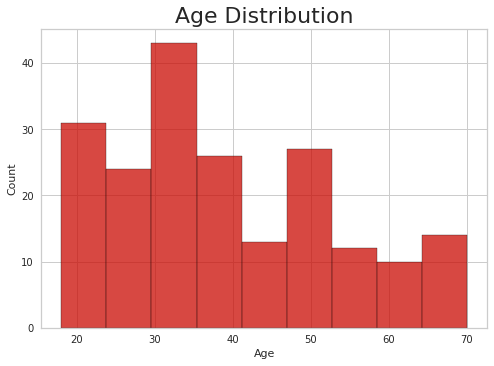

<Figure size 720x720 with 0 Axes>

In [8]:
print("Minimum age:", dataframe['Age'].min(),"Maximum Age: ", dataframe['Age'].max())
sns.histplot(dataframe['Age'], color = 'r')
plt.title("Age Distribution", fontsize = 22)
plt.figure(figsize= (10, 10))
plt.show()

Basic distribution of age. We see people of 18 to 70 years old age doing shopping and people of 30 to 35 years old visit the mall most frequent.

In thousands Lowest annual income: 15 Highest annual income:  137


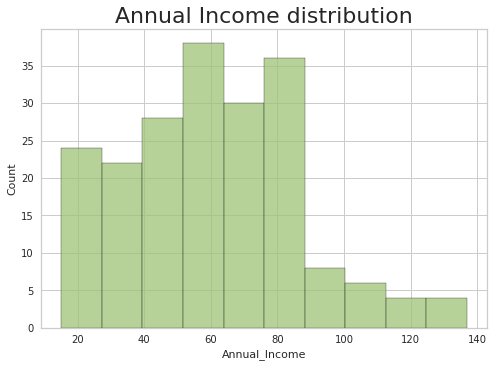

<Figure size 720x720 with 0 Axes>

In [9]:
print("In thousands Lowest annual income:", dataframe['Annual_Income'].min(),"Highest annual income: ", dataframe['Annual_Income'].max())
sns.histplot(dataframe['Annual_Income'], color = 'g')
plt.title("Annual Income distribution", fontsize = 22)
plt.figure(figsize = (10, 10))
plt.show()

Among the people visiting here the lowest earner earns 15k and highest earner earns 137k. People earning from 55k to 62k and 78k to 83k visits the mall more than the others.

Lowest spending score: 1 Highest spending score:  99


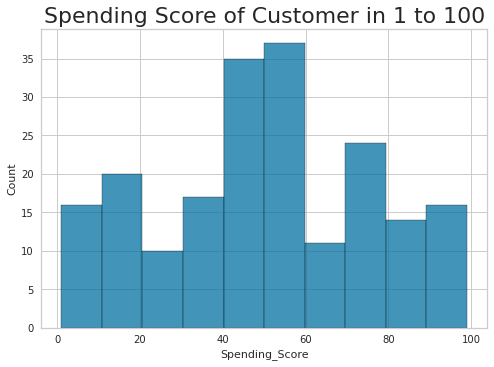

<Figure size 720x720 with 0 Axes>

In [10]:
print("Lowest spending score:", dataframe['Spending_Score'].min(),"Highest spending score: ", dataframe['Spending_Score'].max())
sns.histplot(data=dataframe['Spending_Score'], bins = 10, color = 'b')
plt.title("Spending Score of Customer in 1 to 100", fontsize = 22)
plt.figure(figsize = (10, 10))
plt.show()

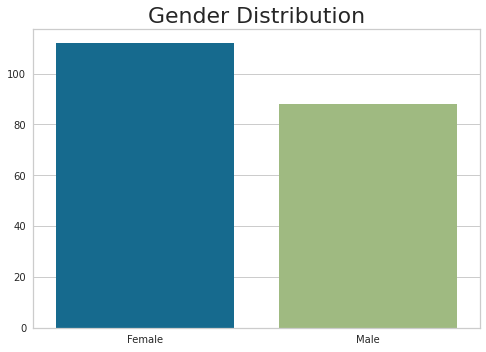

<Figure size 720x720 with 0 Axes>

In [11]:
counts = dataframe['Gender'].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.title("Gender Distribution", fontsize = 22)
plt.figure(figsize = (10, 10))
plt.show()

We can see that the females visit the mall more often than males.

### We don't need the Customer Id to make inferences and relations, so we drop the column customer ID from the dataframe

In [12]:
dataframe = dataframe.drop('CustomerID', axis=1)

let's look for visible correlations within the existing

In [13]:
dataframe.corr()

,Age,Annual_Income,Spending_Score
Age,1.000000,-0.012398,-0.327227
Annual_Income,-0.012398,1.000000,0.009903
Spending_Score,-0.327227,0.009903,1.000000


## We try to figure out if there are any relations among any of the remanining columns with the help of sns pairplot

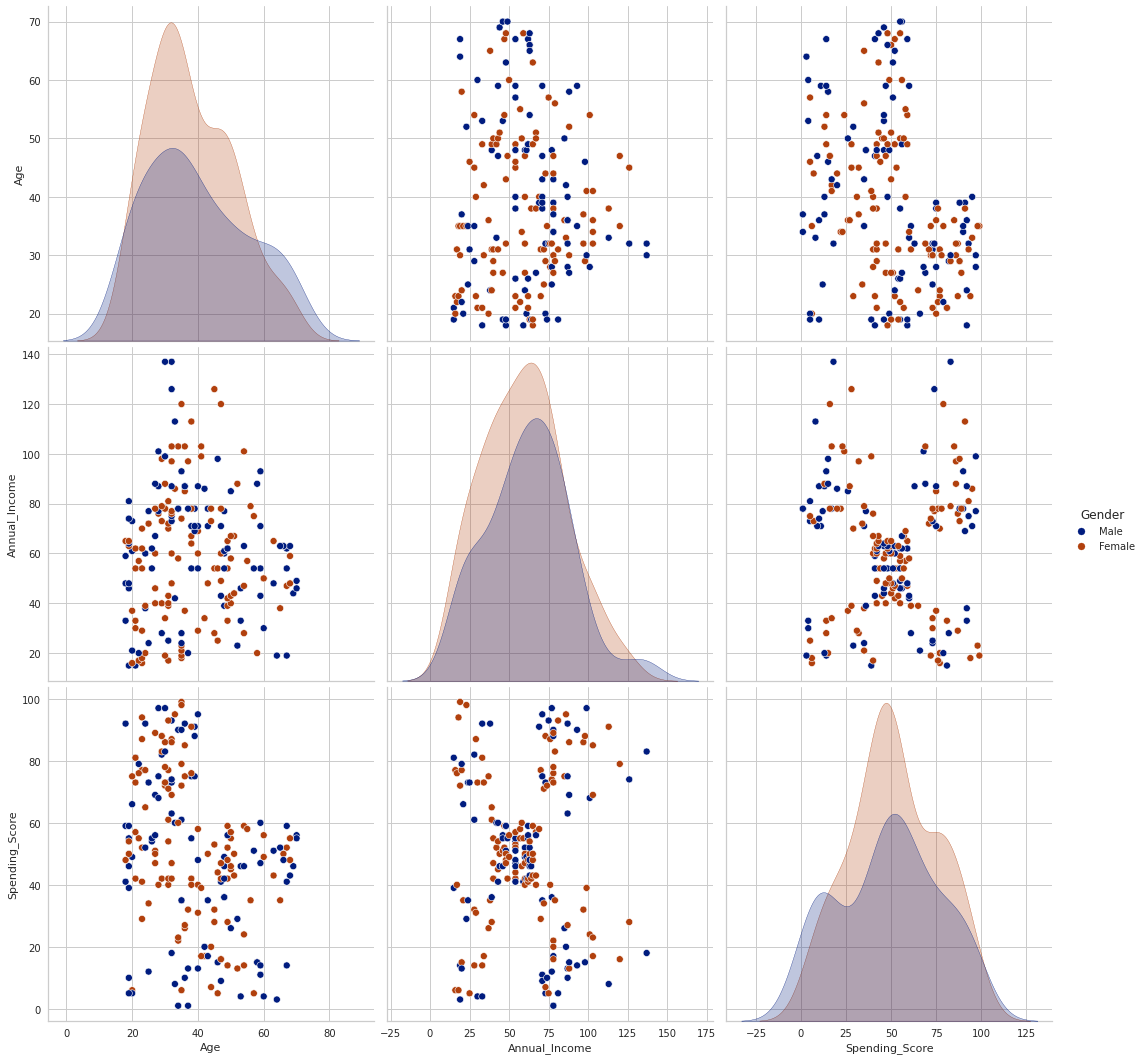

In [14]:
sns.pairplot(dataframe, hue = 'Gender', palette='dark', height = 5)

Here we look at each of their relationship with each other. we observe some clusters with our naked eye in the pairplot of annual income and spending score. other than that we fail to notice any significant clusters.
* We can see Annual income and spending score based cluster through our naked eye, so we will make a cluster on just these two parameters.
* Then we can also see there might be clusters based on spending score and age. so we will take them into consideration for another cluster.
* And we will try to visualise another cluster taking all these three into consideration.


## Now we try to find the optimal number of clusters with the help of elbow method and silhouette scores

Let's prepare the model. we initiate the random state as 7 so that we get the same initial randomness. so that our value doesn't change over time.

**Model to be used in analysis of optimal cluster number**

In [15]:
model = KMeans(random_state=7)

### Cluster based on annual income and spending score

First let's prepare a model to form cluster based on the parameters annual income and spending score. We name the model model_clust_1 and name the prepared dataset training_clust_1.

In [16]:
features = dataframe[['Age', 'Annual_Income', 'Spending_Score']]
features.head()

,Age,Annual_Income,Spending_Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


Now we scale the features with the help of standard scaler. and preparation for training_clust_1 is completed.

In [17]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
training_clust_1 = features_scaled.copy()

Here we see a elbow method analysis and visualise it using KElbowVisualizer. let's see the analysis for clusters 2 to 10.

In [18]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
X = features_scaled.copy()

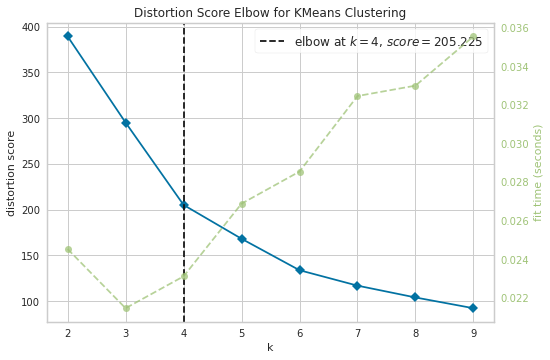

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(training_clust_1)   
visualizer.show()

We see that according to elbow method the number 5 is the best option to create clusters.

Now we take the silhouette score into account and try to find out the optimal number of clusters.


> The Silhouette score in the K-Means clustering algorithm is between -1 and 1. This score represents how well the data point has been clustered, and scores above 0 are seen as good, while negative points mean your K-means algorithm has put that data point in the wrong cluster.


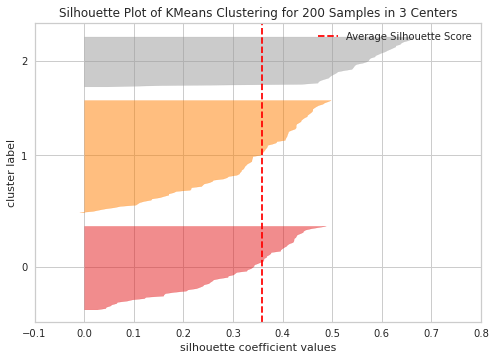

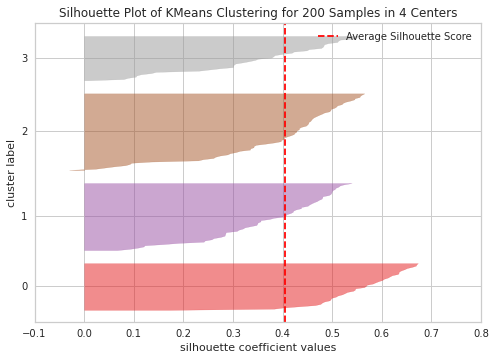

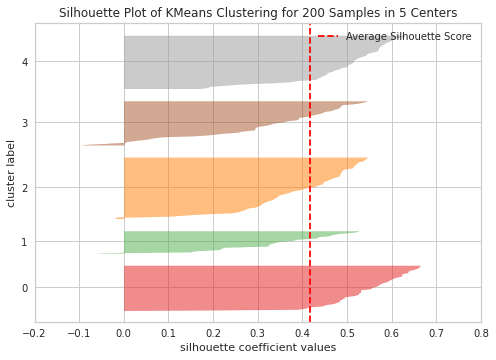

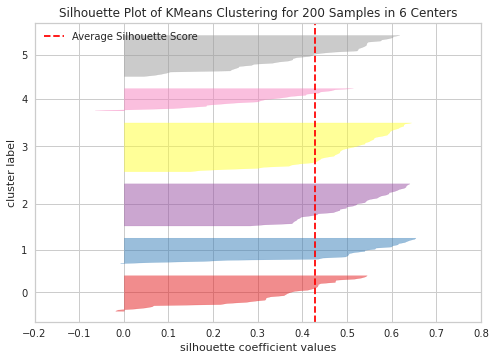

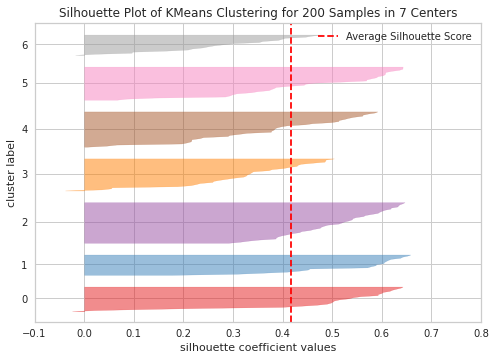

In [20]:
for i in [3, 4, 5, 6, 7]:  # we take 5 probable score where the elbow score is in the middle and 4 surrounding it
  sil_visualizer = SilhouetteVisualizer(KMeans(n_clusters = i, random_state=7))
  sil_visualizer.fit(training_clust_1)    
  sil_visualizer.show()

Here we see the silhouette score tells us that the optimal number of clusters should be 5 or 6. so let's priotize the elbow score value and take 5 clusters for this model.

**Model for annual income and spending score based cluster**

In [21]:
model_clust_1 = KMeans(n_clusters=5, random_state= 7)

Create the dataframe to visualise our clustering.

In [22]:
dataframe_model_clust_1 = dataframe.copy()
dataframe_model_clust_1['Cluster'] = model_clust_1.fit_predict(training_clust_1)

In [23]:
dataframe_model_clust_1.head()

,Gender,Age,Annual_Income,Spending_Score,Cluster
0,Male,19,15,39,2
1,Male,21,15,81,2
2,Female,20,16,6,1
3,Female,23,16,77,2
4,Female,31,17,40,2


Now we visualise the clusters with scatterplot from seaborn library.

<AxesSubplot:xlabel='Annual_Income', ylabel='Spending_Score'>

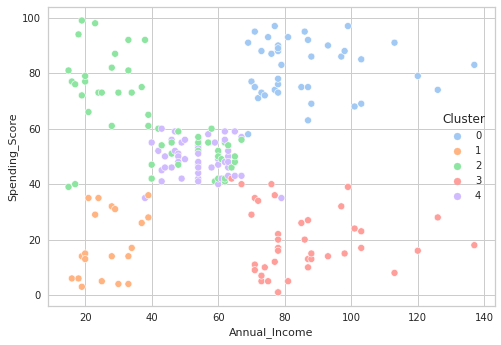

In [24]:
sns.scatterplot(data=dataframe_model_clust_1, x="Annual_Income", y="Spending_Score", hue="Cluster", palette="pastel")

### Cluster based on spending score and age

First let's prepare a model to form cluster based on the parameters annual income and spending score. We name the model model_clust_2 and name the prepared dataset training_clust_2.


In [25]:
features = dataframe[['Age', 'Spending_Score']]
features.head()

,Age,Spending_Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


Now we scale the features with the help of standard scaler. and preparation for training_clust_2 is completed.

In [26]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
training_clust_2 = features_scaled.copy()

Here we see a elbow method analysis and visualise it using KElbowVisualizer. let's see the analysis for clusters 2 to 10.**

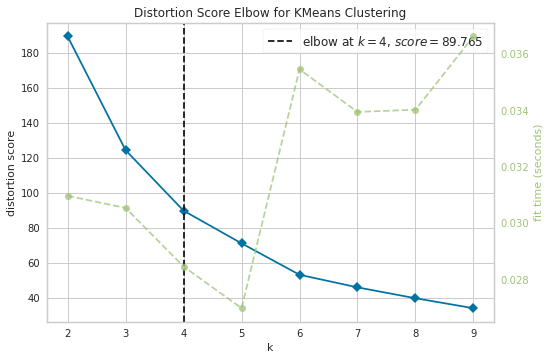

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(training_clust_2)   
visualizer.show()

We see that according to elbow method the number 4 is the best option to create clusters.

Now we take the silhouette score into account and try to find out the optimal number of clusters.


> The Silhouette score in the K-Means clustering algorithm is between -1 and 1. This score represents how well the data point has been clustered, and scores above 0 are seen as good, while negative points mean your K-means algorithm has put that data point in the wrong cluster.


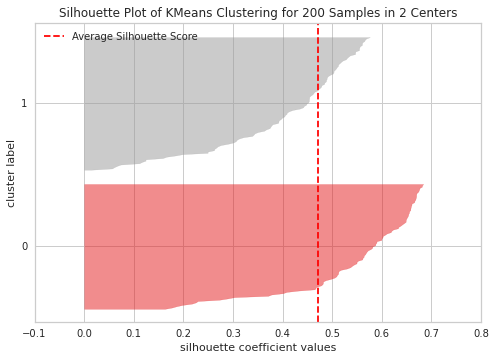

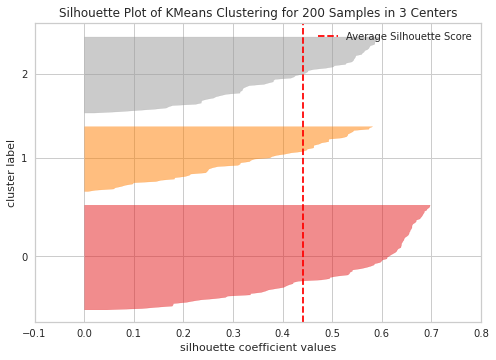

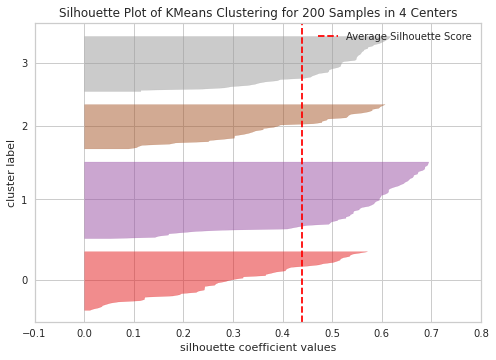

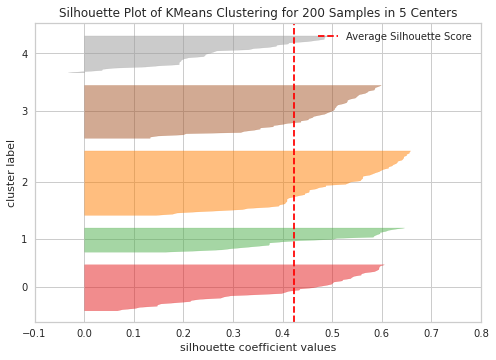

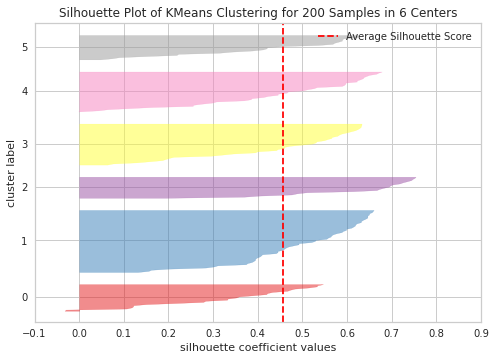

In [28]:
for i in [2, 3, 4, 5, 6]:  # we take 5 probable score where the elbow score is in the middle and 4 surrounding it
  sil_visualizer = SilhouetteVisualizer(KMeans(n_clusters = i, random_state=7))
  sil_visualizer.fit(training_clust_2)    
  sil_visualizer.show()

Here we see the silhouette score cannot tell us the optimal number of clusters. so let's value the elbow score values and take 4 clusters for this model.

**Model for age and spending score based cluster**

In [29]:
model_clust_2 = KMeans(n_clusters=4, random_state= 7)

Create the dataframe to visualise our clustering.

In [30]:
dataframe_model_clust_2 = dataframe.copy()
dataframe_model_clust_2['Cluster'] = model_clust_2.fit_predict(training_clust_2)

In [31]:
dataframe_model_clust_2.head()

,Gender,Age,Annual_Income,Spending_Score,Cluster
0,Male,19,15,39,0
1,Male,21,15,81,1
2,Female,20,16,6,0
3,Female,23,16,77,1
4,Female,31,17,40,0


Now we visualise the clusters with scatterplot from seaborn library.

<AxesSubplot:xlabel='Age', ylabel='Spending_Score'>

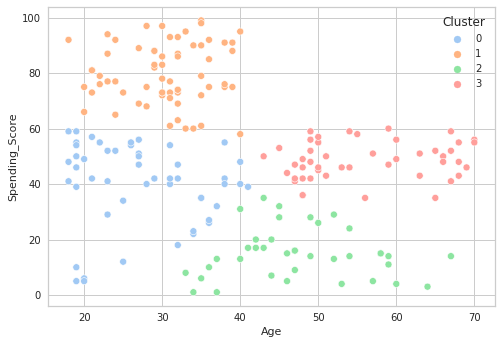

In [32]:
sns.scatterplot(data=dataframe_model_clust_2, x="Age", y="Spending_Score", hue="Cluster", palette="pastel")

### Cluster based on age, annual income and spending score

First let's prepare a model to form cluster based on all the numeric parameters age, annual income and spending score. We name the model model_clust_3 and name the prepared dataset training_clust_3.



In [33]:
features = dataframe[['Age','Annual_Income', 'Spending_Score']]
features.head()

,Age,Annual_Income,Spending_Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


Now we scale the features with the help of standard scaler. and preparation for training_clust_3 is completed.

In [34]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
training_clust_3 = features_scaled.copy()

Here we see a elbow method analysis and visualise it using KElbowVisualizer. let's see the analysis for clusters 2 to 10.



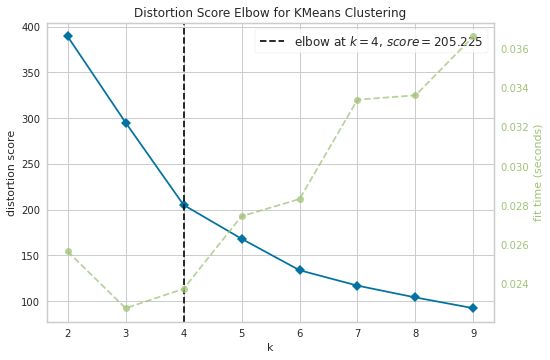

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [35]:
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(training_clust_3)   
visualizer.show()

We see that according to elbow method the number 4 is the best option to create clusters.

Now we take the silhouette score into account and try to find out the optimal number of clusters.


> The Silhouette score in the K-Means clustering algorithm is between -1 and 1. This score represents how well the data point has been clustered, and scores above 0 are seen as good, while negative points mean your K-means algorithm has put that data point in the wrong cluster.

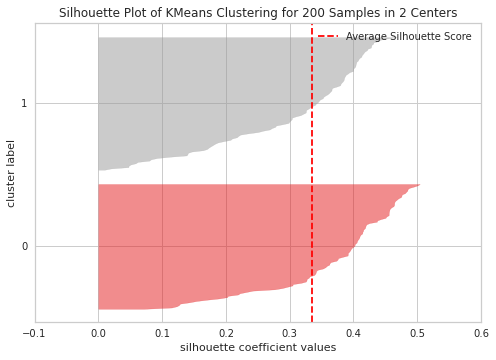

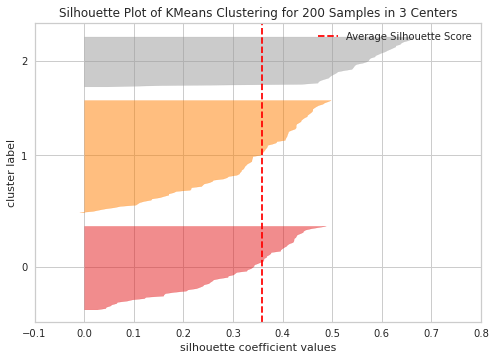

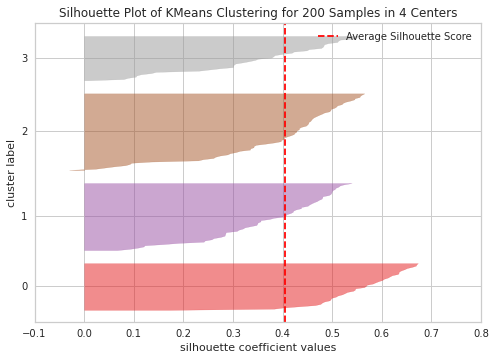

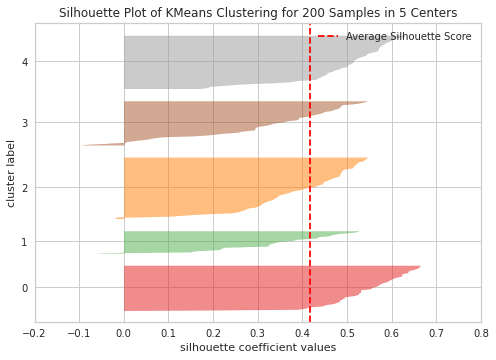

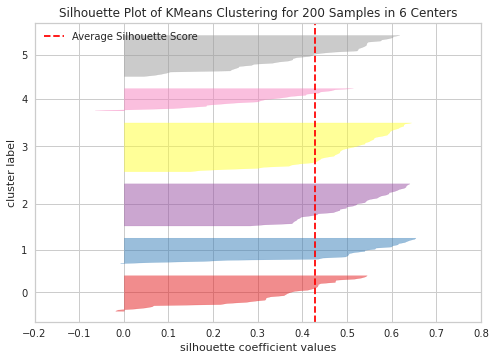

In [36]:
for i in [2, 3, 4, 5, 6]:    # we take 5 probable score where the elbow score is in the middle and 4 surrounding it
  sil_visualizer = SilhouetteVisualizer(KMeans(n_clusters = i, random_state=7))
  sil_visualizer.fit(training_clust_3)    
  sil_visualizer.show()

Here we see the silhouette score tells us that the optimal number of clusters should be 4 or 5. but it's still vague. so we take the elbow score into consideration and make a final model with 4 clusters.



**Model for annual income and spending score based cluster**

In [37]:
model_clust_3 = KMeans(n_clusters=4, random_state= 7)

Create the dataframe to visualise our clustering.

In [38]:
dataframe_model_clust_3 = dataframe.copy()
dataframe_model_clust_3['Cluster'] = model_clust_3.fit_predict(training_clust_3)

In [39]:
dataframe_model_clust_3.head()

,Gender,Age,Annual_Income,Spending_Score,Cluster
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1


Now we visualise the clusters with scatterplot from seaborn library.

Here, we take a 3d plot of the clusters based on the Age, Annual income, Spending Score.



In [40]:
import plotly.express as px

fig = px.scatter_3d(dataframe_model_clust_3, x='Age', y='Annual_Income', z='Spending_Score', color='Cluster', opacity=1)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

These are the clusters that we can extract from the given data set based on age, annual income and the spending score.